In [1]:
from __future__ import print_function
from __future__ import division

import scipy.sparse as sp
import numpy as np

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

K = 30
Kmax = 200
dimen = 2

# Read Biogrid data into pandas dataframe
df = pd.read_table("~/work/example_data.txt", engine="c")

# Create networkx graph from dataframe (single edge)
#G = nx.from_pandas_dataframe(df, 'ID Interactor A', 'ID Interactor B', create_using=nx.Graph())
G = nx.read_edgelist('edgelist.txt',nodetype=int)

# Determine total number of proteins in the network
N = G.number_of_nodes()

# Calculate shortest pathlengths dictionary in the graph up to a threshold using networkx
p = nx.all_pairs_shortest_path_length(G,K)

# Reformat path lengths to sparse matrix (issue with self-interactions!)
dist_df = pd.DataFrame.from_dict(p).replace(0,2)
dist_df = dist_df.fillna(0)-Kmax
dist_df[dist_df == -Kmax] = 0
dist_mat = sp.csr_matrix(dist_df.values)



sum = dist_mat.sum(1)
sumsum = dist_mat.sum()

vdiff = np.ones((dimen,1))
vdiffmax = 1
count = 0

v = []
vnew = []
vdiff = []
Av = []
mv = np.zeros(dimen)
lam = np.zeros(dimen)
xvals = np.zeros((N,dimen))

for i in range(dimen):
	v.append(np.random.randn(N,1))
	vnew.append(np.zeros((N,1)))
	vdiff.append(np.zeros((N,1)))
	Av.append(np.zeros((N,1)))

#########################
v = []
v.append(np.expand_dims(np.loadtxt('random1.txt',dtype=float),1))
v.append(np.expand_dims(np.loadtxt('random2.txt',dtype=float),1))
#########################

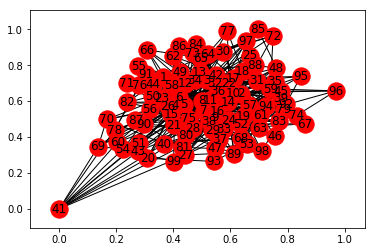

In [2]:
nx.draw_networkx(G)
plt.show()

In [3]:
# Change threshold here!!
while vdiffmax > 0.001:

	for i in range(dimen):
		mv[i] = np.mean(v[i])
		vnew[i] = -0.5*(dist_mat.dot(v[i]) - mv[i]*sum + (mv[i]*sumsum/N - (np.dot(sum.T,v[i])*(1/N)).item()*np.ones((N,1))))

	vnew[0] /= np.linalg.norm(vnew[0],2)

	for i in range(1,dimen):
		pom = np.zeros(vnew[i].shape)

		for j in range(i):
			pom += np.dot(np.dot(vnew[j],vnew[i].T),vnew[j])

		vnew[i] -= pom
		vnew[i] /= np.linalg.norm(vnew[i],2)

	count += 1

	for i in range(dimen):
		vdiff[i] = np.linalg.norm(v[i] - vnew[i],2)

	vdiffmax = max(vdiff)
	#print(vdiffmax)

	for i in range(dimen):
		v[i] = vnew[i]


for i in range(dimen):
	mv[i] = np.mean(v[i])

	Av[i] = -0.5*(dist_mat.dot(v[i]) - mv[i]*sum + (mv[i]*sumsum/N - (np.dot(sum.T,v[i])*(1/N)).item()*np.ones((N,1))))
	lam[i] = np.dot(v[i].T,Av[i])

	xvals[:,i] = np.squeeze(np.sqrt(lam[i]) * v[i])
	xvals[:,i] -= xvals[:,i].min()
	xvals[:,i] /= xvals[:,i].max()

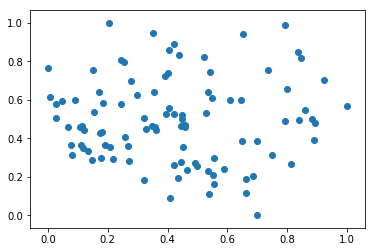

In [4]:
plt.scatter(xvals[:,0],xvals[:,1])
plt.show()

In [5]:
xvals

array([[ 0.17689451,  0.29543952],
       [ 0.2454224 ,  0.57960557],
       [ 0.44620249,  0.46620791],
       [ 0.35043896,  0.94640255],
       [ 0.02787405,  0.50308913],
       [ 0.27788408,  0.6965628 ],
       [ 0.52780382,  0.53240324],
       [ 0.54885267,  0.60977097],
       [ 0.73501494,  0.75452117],
       [ 0.42146364,  0.26139863],
       [ 0.43436106,  0.19560052],
       [ 0.32213942,  0.5069597 ],
       [ 0.26885736,  0.36051032],
       [ 0.53354662,  0.22844409],
       [ 0.26940178,  0.28385864],
       [ 0.61005403,  0.60064948],
       [ 0.44988769,  0.50033739],
       [ 0.58985812,  0.24291513],
       [ 0.39057267,  0.72436154],
       [ 0.25291322,  0.79529524],
       [ 0.40381533,  0.85813231],
       [ 0.44365548,  0.27926517],
       [ 0.25618261,  0.40840049],
       [ 0.64925737,  0.38736996],
       [ 0.20819382,  0.3549967 ],
       [ 0.32882925,  0.45060847],
       [ 0.83613213,  0.85120784],
       [ 0.35808247,  0.46085018],
       [ 0.68543167,

In [6]:
np.array(np.concatenate((v[0],v[1]),1)) - np.loadtxt('v.txt',dtype=float)
v

[matrix([[-0.09853174],
         [-0.07112529],
         [ 0.00917293],
         [-0.02912589],
         [-0.15812967],
         [-0.05814285],
         [ 0.04180785],
         [ 0.05022595],
         [ 0.12467805],
         [-0.00072091],
         [ 0.00443718],
         [-0.04044376],
         [-0.06175292],
         [ 0.04410458],
         [-0.06153519],
         [ 0.07470228],
         [ 0.01064676],
         [ 0.06662531],
         [-0.01307517],
         [-0.06812948],
         [-0.00777902],
         [ 0.0081543 ],
         [-0.06682195],
         [ 0.09038092],
         [-0.08601416],
         [-0.03776829],
         [ 0.16511797],
         [-0.02606901],
         [ 0.10484815],
         [-0.12631006],
         [-0.12426552],
         [ 0.13066314],
         [-0.00104433],
         [-0.12123778],
         [ 0.09610821],
         [ 0.00963995],
         [ 0.19929945],
         [ 0.14991426],
         [ 0.04671375],
         [ 0.04447371],
         [-0.10124372],
         [ 0.110